# Selecting a Machine Learning Model
This notebook contains the code for the sixth part of this data science project - model selection. Section headings have been included for convenience and the full writeup is available [on my website](https://www.pineconedata.com/2024-08-12-basketball-select-ml-ols/).

## Project Overview
This is part of a series that walks through the entire process of a data science project - from initial steps like data acquisition, preprocessing, and cleaning to more advanced steps like feature engineering, creating visualizations, and machine learning. The dataset used in this project contains individual basketball player statistics (such as total points scored and blocks made) for the 2023-2024 NCAA women’s basketball season.

### Articles in this Series   
1. [Acquiring and Combining the Datasets](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/)
2. [Cleaning and Preprocessing the Data](https://www.pineconedata.com/2024-05-02-basketball-data-cleaning-preprocessing/)
3. [Engineering New Features](https://www.pineconedata.com/2024-05-30-basketball-feature_engineering/)
4. [Exploratory Data Analysis](https://www.pineconedata.com/2024-06-28-basketball-data-exploration/)
5. [Visualizations, Charts, and Graphs](https://www.pineconedata.com/2024-07-29-basketball-visualizations/)
6. [Selecting a Machine Learning Model](https://www.pineconedata.com/2024-08-12-basketball-select-ml-ols/) (This Notebook)
7. [Training the Machine Learning Model](https://www.pineconedata.com/2024-09-13-basketball-train-ols/)
8. [Evaluating the Machine Learning Model](https://www.pineconedata.com/2024-11-27-basketball-evaluate-ols-model/)


# Getting Started
Full requirements and environment setup information is detailed in the [first article of this series](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/).

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Data

In [2]:
from pathlib import Path


data_folder = Path.cwd().parent / 'data'

In [3]:
player_data = pd.read_excel(data_folder / 'player_data_engineered.xlsx')
player_data.head()

,PLAYER_NAME,Team,Class,Height,Position,PLAYER_ID,TEAM_NAME,GAMES,MINUTES_PLAYED,FIELD_GOALS_MADE,...,Conference,MINUTES_PER_GAME,FOULS_PER_GAME,POINTS_PER_GAME,ASSISTS_PER_GAME,STEALS_PER_GAME,BLOCKS_PER_GAME,REBOUNDS_PER_GAME,ASSIST_TO_TURNOVER,FANTASY_POINTS
0,Kiara Jackson,UNLV (Mountain West),Junior,67,Guard,ncaaw.p.67149,UNLV,29,895,128,...,Mountain West,30.862069,1.620690,11.137931,4.655172,1.068966,0.172414,4.448276,3.214286,710.3
1,Raven Johnson,South Carolina (SEC),Sophomore,68,Guard,ncaaw.p.67515,South Carolina,30,823,98,...,SEC,27.433333,1.133333,8.100000,4.933333,2.000000,0.166667,5.366667,2.792453,735.2
2,Gina Marxen,Montana (Big Sky),Senior,68,Guard,ncaaw.p.57909,Montana,29,778,88,...,Big Sky,26.827586,0.896552,10.241379,3.827586,0.551724,0.068966,2.068966,2.921053,533.5
3,McKenna Hofschild,Colorado St. (Mountain West),Senior,62,Guard,ncaaw.p.60402,Colorado St.,29,1046,231,...,Mountain West,36.068966,1.172414,22.551724,7.275862,1.241379,0.137931,3.965517,2.971831,1117.5
4,Kaylah Ivey,Boston College (ACC),Junior,68,Guard,ncaaw.p.64531,Boston Coll.,33,995,47,...,ACC,30.151515,1.454545,4.333333,5.636364,1.090909,0.030303,1.727273,2.906250,500.4


# Basics of Machine Learning

# Model Selection

## Define the Objective

### Define the Target Variable

In [4]:
numerical_columns = ['Height', 'MINUTES_PLAYED', 'FIELD_GOALS_MADE', 
                     'THREE_POINTS_MADE', 'TWO_POINTS_MADE', 'FREE_THROWS_MADE',
                     'TOTAL_REBOUNDS', 'ASSISTS', 'TURNOVERS', 
                     'STEALS', 'BLOCKS', 'FOULS', 'POINTS', 'FANTASY_POINTS']

In [5]:
target = 'FANTASY_POINTS'

### Define the Features

In [6]:
features = ['Height', 'MINUTES_PLAYED', 'FIELD_GOALS_MADE', 'THREE_POINTS_MADE',
            'TWO_POINTS_MADE', 'FREE_THROWS_MADE', 'TOTAL_REBOUNDS', 'ASSISTS',
            'TURNOVERS', 'STEALS', 'BLOCKS', 'FOULS', 'POINTS']

### Ultimate Objective

### A Solved Problem

## Identify Appropriate Models

In [7]:
len(player_data)

895

In [8]:
player_data['FANTASY_POINTS'].dtypes

dtype('float64')

In [9]:
player_data['FANTASY_POINTS'].sample(10)

387     463.3
105     520.3
507     842.0
66      489.4
347     858.6
482    1085.8
161     591.4
346     836.4
99      476.5
571     780.5
Name: FANTASY_POINTS, dtype: float64

## Model Characteristics

## Verify Assumptions of the Model

### Linearity

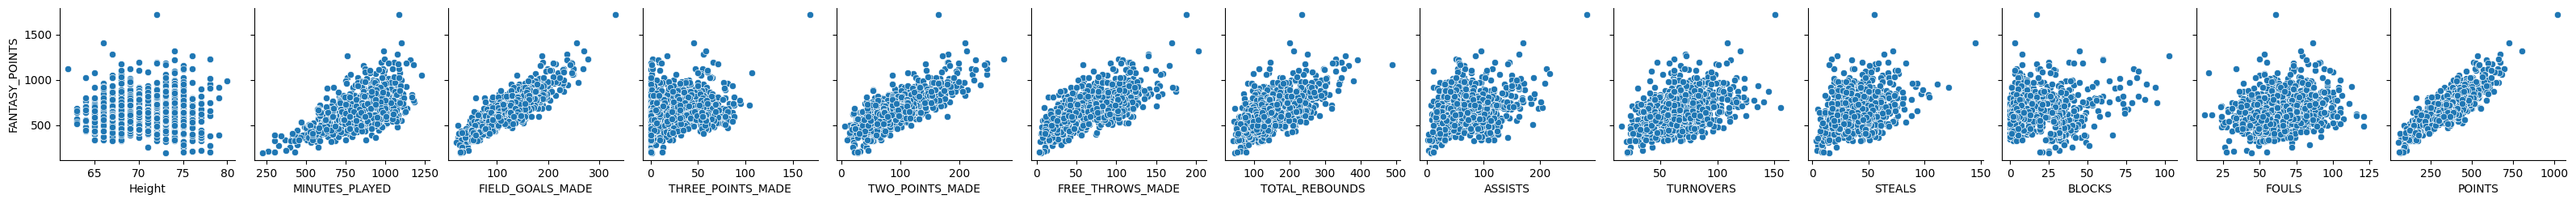

In [10]:
pairplot = sns.pairplot(data=player_data, x_vars=features, y_vars=target)

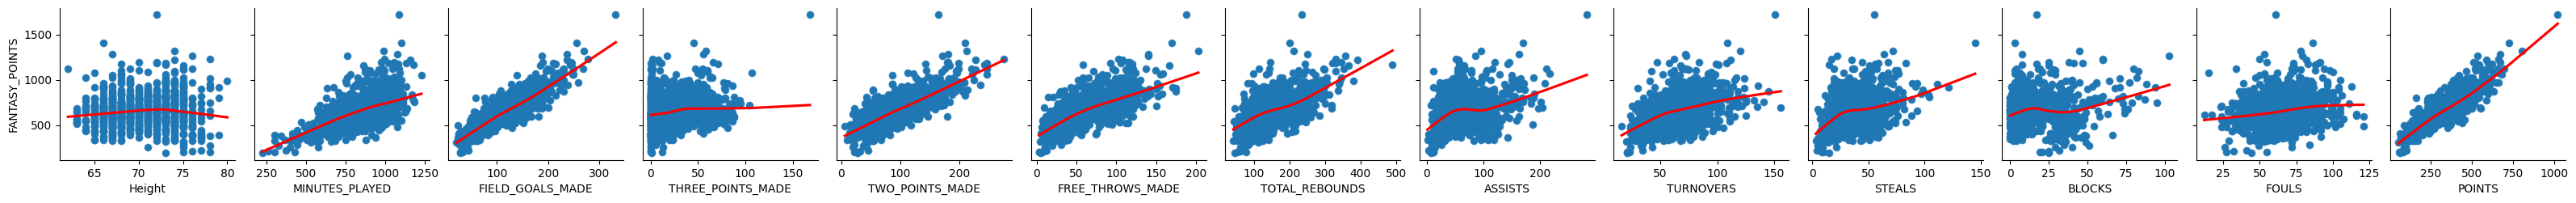

In [11]:
def loess_reg(x, y, **kwargs):
    sns.regplot(x=x, y=y, lowess=True, line_kws={'color': 'red'}, **kwargs)


pairplot = sns.pairplot(data=player_data, x_vars=features, y_vars=target)
pairplot.map(loess_reg)

### No Multicollinearity

<Axes: >

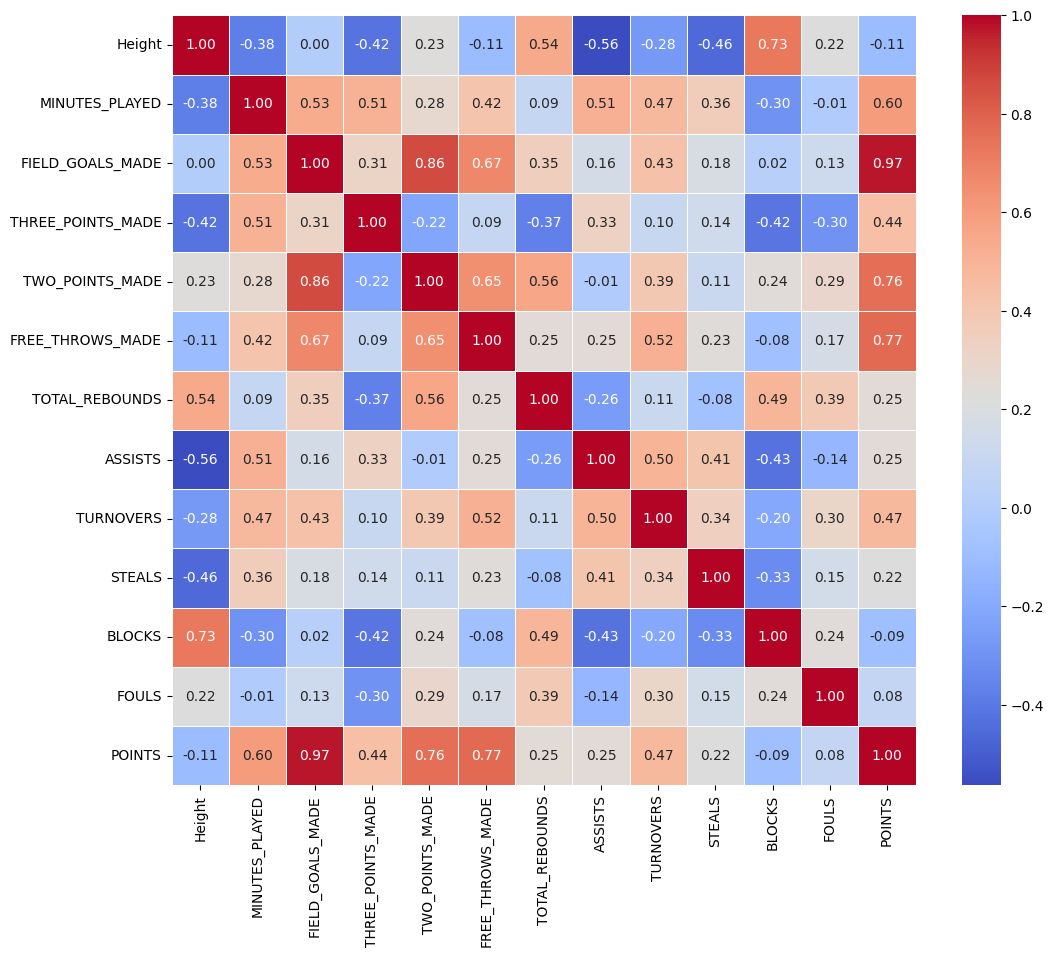

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = player_data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)